# **Exercise: Two dimensional ideal gas**


This week you will simulate a 2D ideal gas in a box at a given temperature $T$, and calculate the pressure $p$ of the system by modelling the collisions of the gas particles with the walls of the box.

The following assumptions will be made for the interactions in the system:
1. Particles collide **only with walls**, never amongst themselves.
2. Collisions are **fully elastic**, energy is conserved.

The ideal gas law, adjusted for two dimensions (volume $V$ becomes area $A$) is given by Equation 1.


$$ pA = N k_{B} T \tag{Equation 1.}$$


   <br>

The translational kinetic energy of the gas can be obtained by summing over that of every single particle contained in our system.


$$ {K}_{t, system} = \sum_{n=1}^{N} {K}_{t, n} \tag{Equation 2.}$$


   <br>


We are then able to tie this kinetic energy back to a macroscopic variable (temperature $T$) through the following equation (again, adjusted for the dimensionality of the problem).


$$ {K}_{t, system} = k_{B} T \tag{Equation 3.}$$

   <br>


In order to model the particle collisions in line with the assumptions of the model, the following must be considered:

Upon colliding with a wall perpendicular to the direction $i$, the particle's velocity (and consequently momentum) along the relevant direction ($i$) is inverted, such that:

$$ \Delta v_{i} = -2 v_{i} \tag{Equation 4.}$$
   <br>

This momentum implies a force being applied on the wall perpendicular to the ($i$) direction, which can be computed from:

$$ F_{i} = \frac{dp_{i}}{dt} \tag{Equation 5.}$$


The total pressure of the system can then be found by averaging the total force, over the perimeter of the box (total of 4 walls with lenght $l_{i}$):

$$ P = \frac {\sum_{i=1}^{4}F_{i}}{\sum_{i=1}^{4}l_{i}} \tag{Equation 6.}$$


With all the relevant relations being layed out, we are ready to start building our model!



# **Task 1: IdealGasParticle Class**

The first task is to write the `IdealGasParticle` class. This will be used in our model to instantiate each of our particles and keep track of their positions and velocities.

1. **Define the constructor function `__init__`:**

    -This function must take the inputs `mass`, `temperature` and `box_size` and set the following attributes:

    - `self.mass`
    - `self.position`: intialised to a random point inside the box we are simulating.
    - `self.velocity`: (This has been provided by us for this exercise).
    
<br>

2. **The method `initialize_velocity` is provided by us in this exercise. This initialises the velocity of the particle as a vector with randomly generated direction, and a magnitude which is sampled from the Maxwell Boltzmann distribution for a gas of a given temperature and mass.**

<br>

3. **Define the method `update_position` in the `IdealGasParticle` class:**

    -This function must take the input `time_step` and update the particle's position (`self.position`) based on its velocity (`self.velocity`) and the given `time_step`.
    <n>
    -This must be done for every coordinate of the system separately: Iterate over the 2 dimensions of the box.


In [80]:
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline
from scipy.stats import maxwell
import numpy as np 

class IdealGasParticle:
    def __init__(self, mass, temperature, box_size:tuple):
        self.mass = mass
        # self.temperature = temperature
        self.box_size = box_size
        self.position = [random.uniform(0, box_size[0]), random.uniform(0, box_size[1])]
        self.initialize_velocity(mass, temperature)

        
    def initialize_velocity(self, mass, temperature):
        k_B = 1.380649e-23  # Boltzmann constant in J/K
        v_rms =  maxwell.rvs(scale=np.sqrt(k_B * temperature / mass), size=1)
        theta = random.uniform(0, 2 * np.pi)
        v_x = v_rms * np.cos(theta)
        v_y = v_rms * np.sin(theta)
        self.velocity = [v_x, v_y]

        
    def update_position(self, time_step):
        for idx, coord in enumerate(box_size):
            self.position[idx] += self.velocity[idx] * time_step


# **Task 2: IdealGasBox Class**

The second task is to write the `IdealGasBox` class. This will hand the box containing all the particles, and will make use of the `IdealGasParticle` class implemented above.


1. **Define the constructor function `__init__`:**

    -This function must take the inputs `particles`, `mass`, `box_size` and `temperature` and set the following attributes:

    - `self.particles`: (a list of `IdealGasParticle` objects with length N=`particles`. Hint: you can have a list of `objects` from a class. Generate this with a list comprehension.),
    - `self.box_size`: (dimensions of the box).
    - `self.temperature`: (temperature of the gas).
    - `self.time_step`: This has been provided by us for this exercise. This is set so that we make sure to sample the path of the fastest particle in our system 100 times between collisions. this will guarantee every collision is correctly accounted for.
    
    <br>

2. **Define the method `move_particles` in the `IdealGasBox`:**
    - This function must take the input `time_step` as a parameter.
    - Iterate through each particle object and each coordinate in the system, and update its position using the `update_position` method from the `IdealGasParticle` class.
    - Hint: pay attention when dealing with objects of a different class inside a class. Take care when using  `self.` when updating the `self.position` attributes of each particle object while operating inside the `IdealGasBox` class.
   
   <br>

3. **Define the method `handle_wall_collisions` in the `IdealGasBox` class:**
    - This function takes no inputs other than `self`.
    - Iterate through each particle object, and check if the particle is outside the box (for each coordinate) - this is a collision in our model.
    - If a collision occurs, reverse the corresponding velocity component.

    <br>

4. **Define the method `calculate_pressure` in the `IdealGasBox` class:**
    - This function takes no inputs other than `self`.
    - Initialize a counter `total_momentum` for the total momentum change of all the particles.
    - Iterate through each particle object, and check if the particle is outside the box (for each coordinate) - this is a collision in our model.
    - If a collision occurs, calculate the momentum change for the particle in the approproate coordinate, and add it to the counter.
    - Use the formula for pressure: `pressure = total_momentum / (perimeter * self.time_step)`.
    - This function must return the `pressure` as a float and the number of `collisions` as an integer.

    <br>

5. **Define the method `simulate` in the `IdealGasBox` class:**
    - This function takes `num_steps` as a parameter.
    - This functions will perform the simulation of our model for the given number of steps, by following these steps iteratively.
        1. Update particle positions.
        2. Handle wall collisions and update velocities appropriately.
        3. Calculate the amount of collisions and the corresponding pressure at each step.
    - This fuction returns two arrays: one of the values of pressure for each time step, and another for the number of collisions for each time step.

    <br>



In [81]:
class IdealGasBox:
    def __init__(self, mass, temperature, num_particles, box_size):
        self.mass = mass
        self.temperature = temperature
        self.box_size = box_size
        self.particles = [IdealGasParticle(mass, temperature, box_size) for _ in range(num_particles)]
        self.time_step = 0.01 * min(self.box_size) /  max(np.absolute(max([particle.velocity for particle in self.particles]))) # This has been provided by us for this exercise.
        
        
    def move_particles(self, time_step):
        for idx in enumerate(self.particles):
            self.particles[idx].update_position(time_step) # Dimensions considered in update_position


    def handle_wall_collisions(self):
        for particle in self.particles:
            for dim, coord in enumerate(particle.position):
                if coord < 0 or coord >= self.box_size[dim]:
                    particle.velocity[dim] *= -1


    def calculate_pressure(self):
        total_momentum = 0
        collisions = 0

        for particle in self.particles:
            for dim, coord in enumerate(particle.position):
                # Check if the particle is outside the box in the current dimension
                if coord < 0 or coord >= self.box_size[dim]:
                    # Collision occurred, calculate momentum change and update total momentum
                    momentum_change = -2 * particle.mass * particle.velocity[dim]
                    total_momentum += momentum_change
                    collisions += 1

        perimeter = sum(self.box_size) * 2
        pressure = total_momentum / (perimeter * self.time_step)

        return pressure, collisions


    def simulate(self, num_steps):
        pressures = []
        collisions = []
        for step in range(num_steps):
            for particle in self.particles:
                particle.update_position(self.time_step)
            self.handle_wall_collisions()
            pressures.append(self.calculate_pressure()[0])
            collisions.append(self.calculate_pressure()[1])
        p = np.array(pressures)
        col = np.array(collisions)
        return p, col

# **Task 3: Running the simulation and  plotting pressure.**

The third task is to run the model for a set of parameters (an example for these is given below), and generate three plots.

As usual, label your data and axis correctly!

1. **Simulate the 2D ideal gas you just programmed for `100000 steps`**
    - Note, for the provided parameters, this simulation may take up to 5 minutes. Adjusting the number of particles and number of steps will vary the simulation time.

<br>

2. **From the outputs generated by this simulation, generate three plots**:
    - 1. Plot the number of registered collisions htrough time.
    - 2. Plot the pressure over time.
    - 3. Plot the moving average of the pressure for a `window size of 2000 time steps`, and in the same plot, the expected temperature from the ideal gas law equation.



/var/folders/0n/qlsqbkfj2dl5v4_hj0l1288h0000gn/T/ipykernel_49763/818955269.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t = np.arange(0, num_steps * time_step, time_step)


Text(0, 0.5, 'Collisions per second')

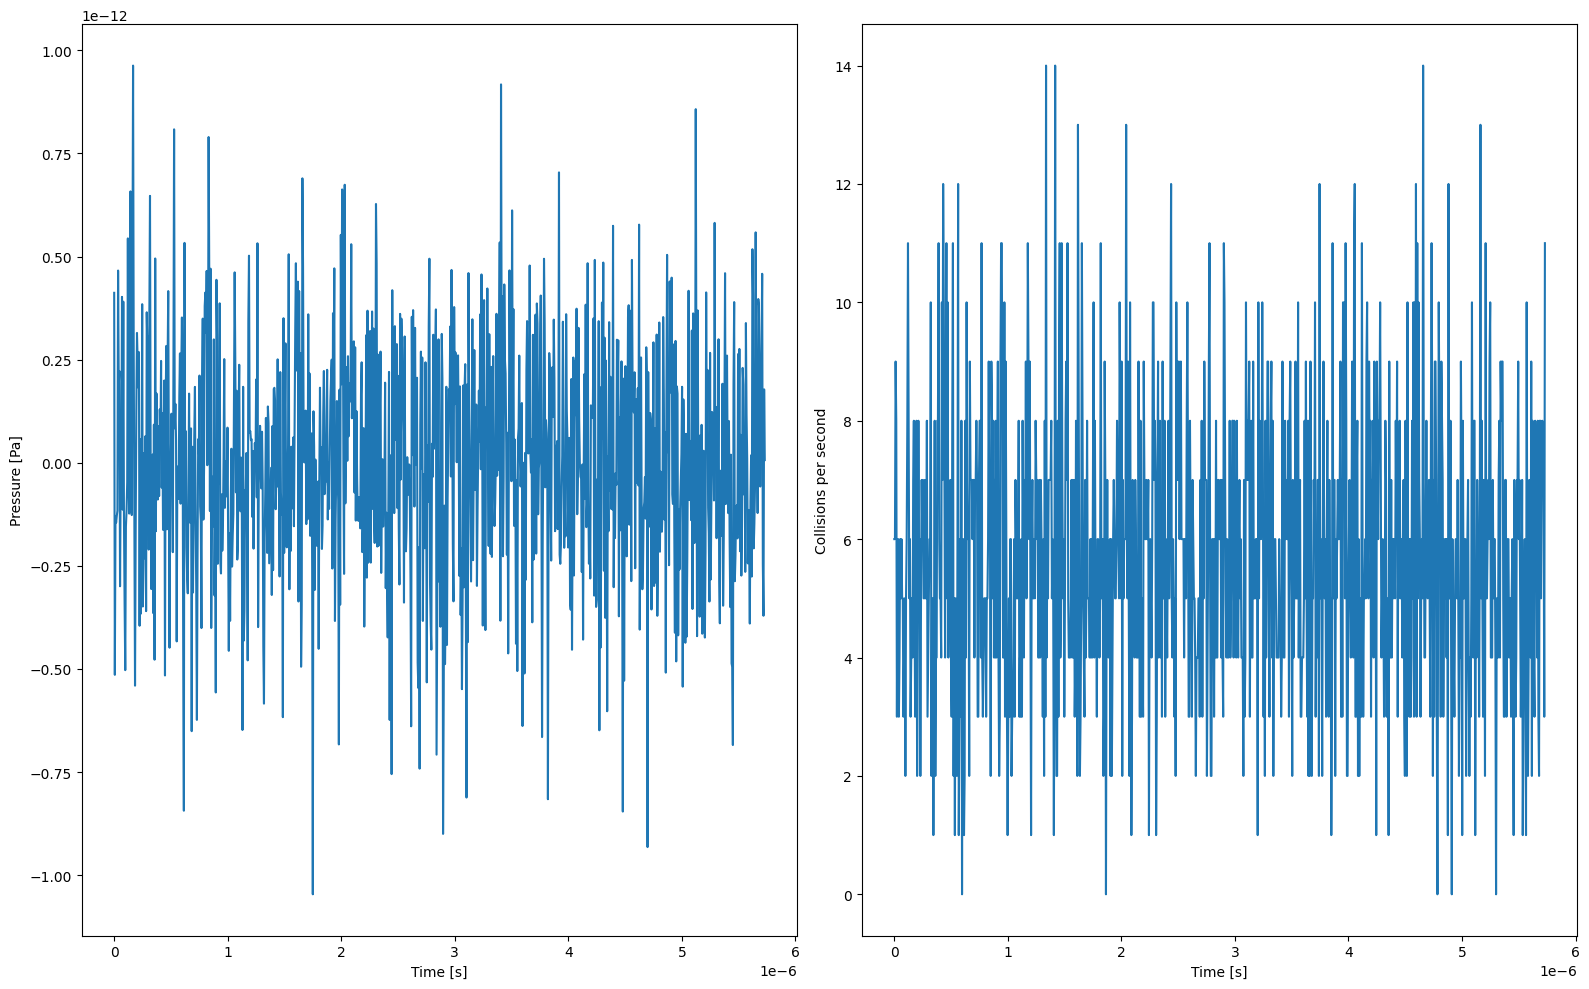

In [82]:
# Simulation inputs
mass = 1.67*10**(-27)
temperature = 3000
k_B = 1.380649e-23  # Boltzmann constant in J/K
box_size = [0.01, 0.01]
num_particles = 1000
num_steps = 1000

cls = IdealGasBox(mass, temperature, num_particles, box_size)
pressures = IdealGasBox.simulate(cls, num_steps)[0]
collisions = IdealGasBox.simulate(cls, num_steps)[1]
time_step = cls.time_step
t = np.arange(0, num_steps * time_step, time_step)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(16,10))
ax1.plot(t, pressures)
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Pressure [Pa]")

ax2.plot(t, collisions)
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Collisions per second")

# **Extra: To think more about the model**
 1. You may have noticed that the pressure calculated from the ideal gas law and and the windowed average do not match for the provided simulation inputs. Why is that?
 2. What happens if you initialise all your particles on the lower left corner of the box? Can you explain the behaviour observed for the pressure?

In [83]:
class IdealCorneredGasParticle:
    def __init__(self, mass, temperature, box_size:tuple):
        self.mass = mass
        self.position = [0, 0]
        self.initialize_velocity(mass, temperature)

        
    def initialize_velocity(self, mass, temperature):
        k_B = 1.380649e-23  # Boltzmann constant in J/K
        v_rms =  maxwell.rvs(scale=np.sqrt(k_B * temperature / mass), size=1)
        theta = random.uniform(0, 2 * np.pi)
        v_x = v_rms * np.cos(theta)
        v_y = v_rms * np.sin(theta)
        self.velocity = [v_x, v_y]

        
    def update_position(self, time_step):
        for idx, coord in enumerate(box_size):
            self.position[idx] += self.velocity[idx] * time_step

In [84]:
class IdealCorneredGasBox:
    def __init__(self, mass, temperature, num_particles, box_size):
        self.mass = mass
        self.temperature = temperature
        self.box_size = box_size
        self.particles = [IdealCorneredGasParticle(mass, temperature, box_size) for _ in range(num_particles)]
        self.time_step = 0.01 * min(self.box_size) /  max(np.absolute(max([particle.velocity for particle in self.particles]))) # This has been provided by us for this exercise.
        
        
    def move_particles(self, time_step):
        for idx in enumerate(self.particles):
            self.particles[idx].update_position(time_step) # Dimensions considered in update_position


    def handle_wall_collisions(self):
        for particle in self.particles:
            for dim, coord in enumerate(particle.position):
                if coord < 0 or coord >= self.box_size[dim]:
                    particle.velocity[dim] *= -1


    def calculate_pressure(self):
        total_momentum = 0
        collisions = 0

        for particle in self.particles:
            for dim, coord in enumerate(particle.position):
                # Check if the particle is outside the box in the current dimension
                if coord < 0 or coord >= self.box_size[dim]:
                    # Collision occurred, calculate momentum change and update total momentum
                    momentum_change = -2 * particle.mass * particle.velocity[dim]
                    total_momentum += momentum_change
                    collisions += 1

        perimeter = sum(self.box_size) * 2
        pressure = total_momentum / (perimeter * self.time_step)

        return pressure, collisions


    def simulate(self, num_steps):
        pressures = []
        collisions = []
        for step in range(num_steps):
            for particle in self.particles:
                particle.update_position(self.time_step)
            self.handle_wall_collisions()
            pressures.append(self.calculate_pressure()[0])
            collisions.append(self.calculate_pressure()[1])
        p = np.array(pressures)
        col = np.array(collisions)
        return p, col

/var/folders/0n/qlsqbkfj2dl5v4_hj0l1288h0000gn/T/ipykernel_49763/191265350.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t = np.arange(0, num_steps * time_step, time_step)


Text(0, 0.5, 'Collisions per second')

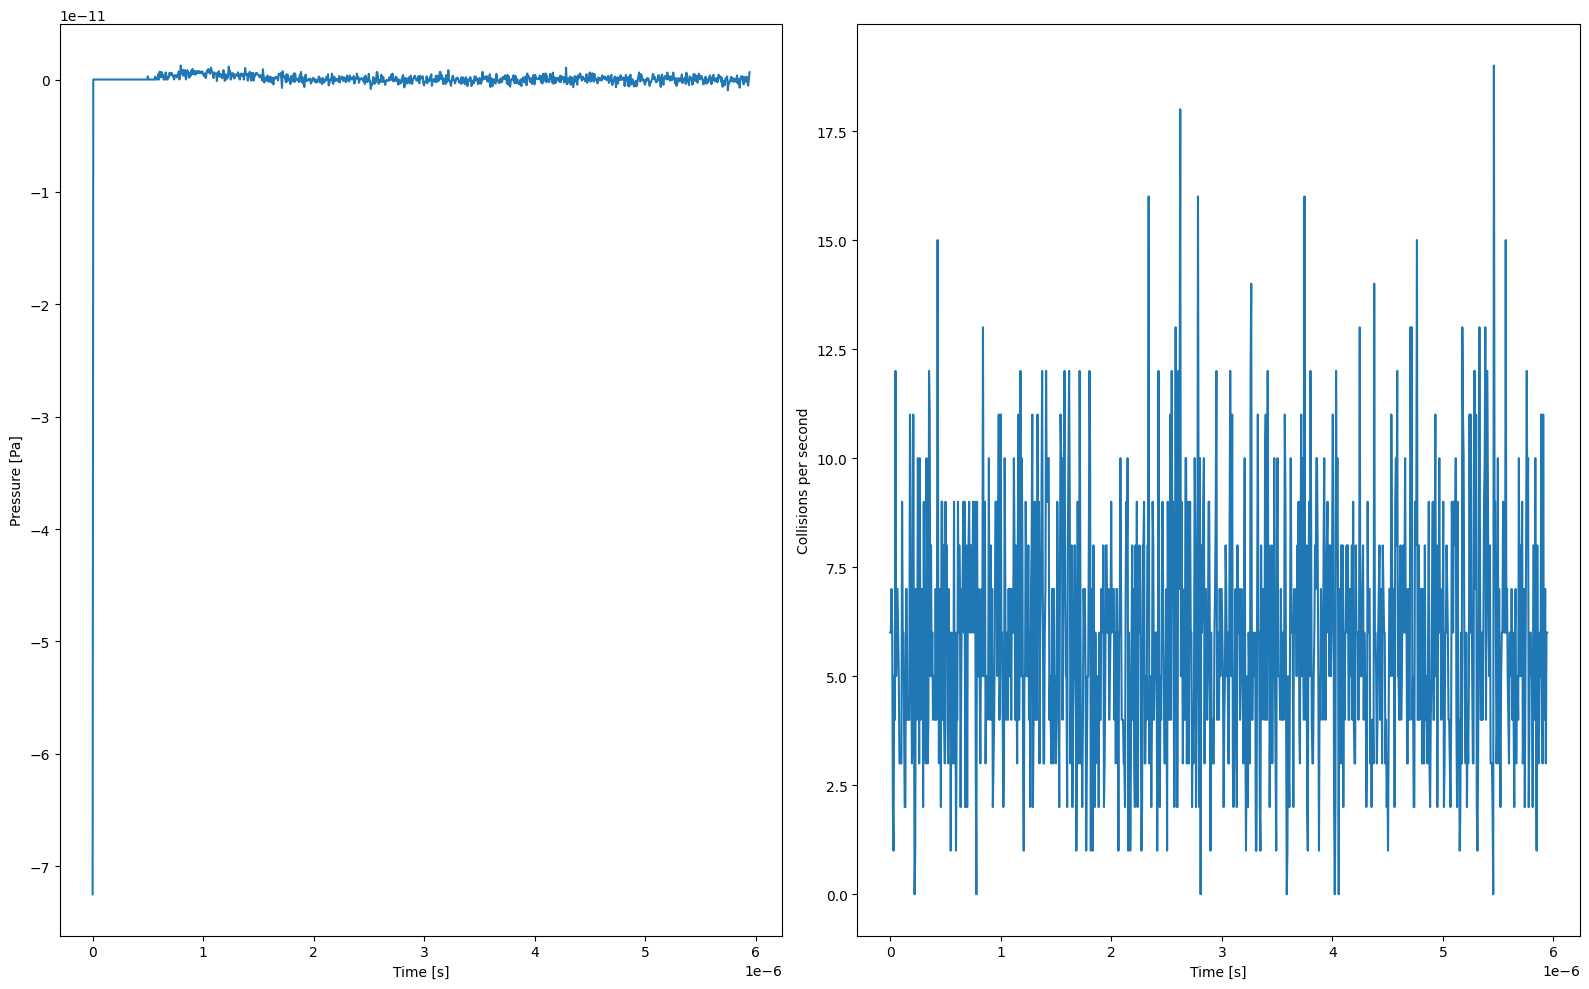

In [85]:
num_particles = 1000
num_steps = 1000

cls_extra = IdealCorneredGasBox(mass, temperature, num_particles, box_size)
pressures = IdealCorneredGasBox.simulate(cls_extra, num_steps)[0]
collisions = IdealCorneredGasBox.simulate(cls_extra, num_steps)[1]
time_step = cls_extra.time_step
t = np.arange(0, num_steps * time_step, time_step)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(16,10))
ax1.plot(t, pressures)
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Pressure [Pa]")

ax2.plot(t, collisions)
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Collisions per second")